In [1]:
import numpy as np
import matplotlib
import cv2
from matplotlib import pyplot as plt 
%matplotlib inline


In [2]:
img = cv2.imread("C:\\Users\\CHANDU\machine learning project\\model\\test_image\\pk-at-bro-pre-release-eventthumb.jpg")
img.shape

(350, 400, 3)

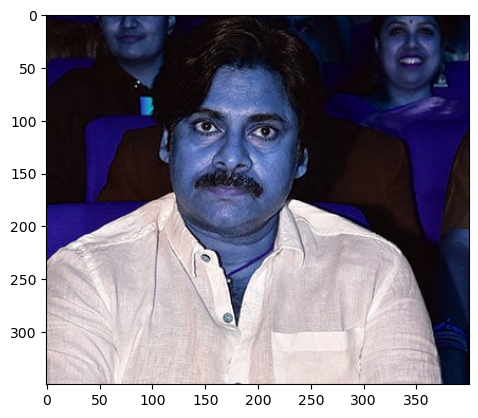

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(350, 400)

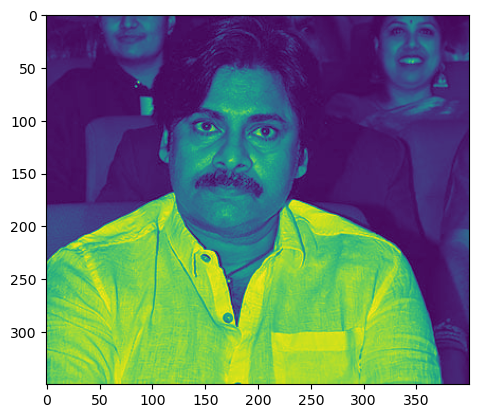

In [5]:
plt.imshow(gray)

In [6]:
face = cv2.CascadeClassifier("C:/Users/CHANDU/machine learning project/model/opencv/haarcascades/haarcascade_frontalface_default.xml")
eye = cv2.CascadeClassifier("C:/Users/CHANDU/machine learning project/model/opencv/haarcascades/haarcascade_eye.xml")
faces = face.detectMultiScale(gray,1.3,5)
faces 

array([[111,  56, 135, 135]])

In [7]:
(x,y,w,h) = faces[0]
x,y,w,h

(111, 56, 135, 135)

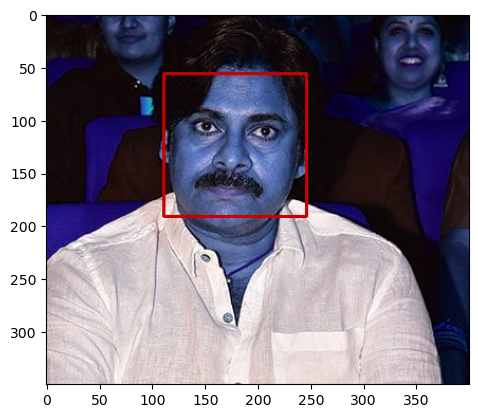

In [8]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(200,0,0),2)
plt.imshow(face_img)


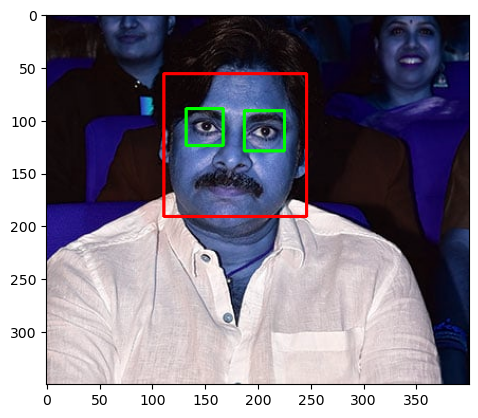

In [9]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

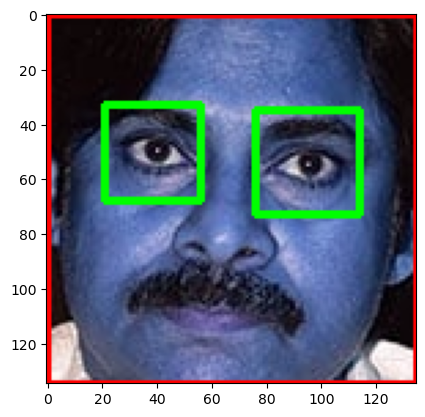

In [10]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [11]:
def croped_img(image_path):
    img = cv2.imread(image_path)
    if img is None :
        return None
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces :
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eyes = eye.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

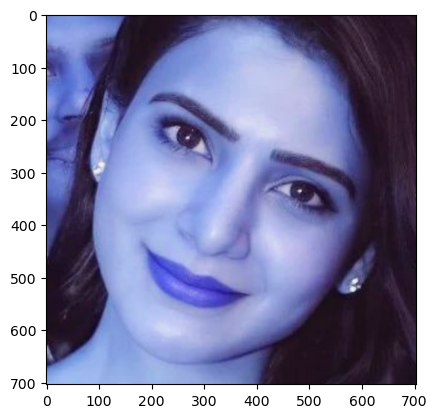

In [12]:
crop = croped_img('./test_image/001-14-2.jpg')
plt.imshow(crop)

In [13]:
path_to_data="./datasets"
path_to_cr_data="./datasets/cropped/"


In [14]:
import os 
img_dirs =[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append((entry.path).replace('\\','/'))

In [15]:
img_dirs

['./datasets/cropped',
 './datasets/ntr',
 './datasets/pawan kalyan',
 './datasets/prabhas',
 './datasets/samantha']

In [16]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [17]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs :
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = croped_img(entry.path)
        if roi_color is not None :
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count +=1
    

cropped
ntr
Generating cropped images in folder:  ./datasets/cropped/ntr
pawan kalyan
Generating cropped images in folder:  ./datasets/cropped/pawan kalyan
prabhas
Generating cropped images in folder:  ./datasets/cropped/prabhas
samantha
Generating cropped images in folder:  ./datasets/cropped/samantha


In [18]:

celebrity_file_names_dict.items()

dict_items([('cropped', []), ('ntr', ['./datasets/cropped/ntr/ntr1.png', './datasets/cropped/ntr/ntr2.png', './datasets/cropped/ntr/ntr3.png', './datasets/cropped/ntr/ntr4.png', './datasets/cropped/ntr/ntr5.png', './datasets/cropped/ntr/ntr6.png', './datasets/cropped/ntr/ntr7.png', './datasets/cropped/ntr/ntr8.png', './datasets/cropped/ntr/ntr9.png', './datasets/cropped/ntr/ntr10.png', './datasets/cropped/ntr/ntr11.png', './datasets/cropped/ntr/ntr12.png', './datasets/cropped/ntr/ntr13.png', './datasets/cropped/ntr/ntr14.png', './datasets/cropped/ntr/ntr15.png', './datasets/cropped/ntr/ntr16.png', './datasets/cropped/ntr/ntr17.png', './datasets/cropped/ntr/ntr18.png', './datasets/cropped/ntr/ntr19.png', './datasets/cropped/ntr/ntr20.png', './datasets/cropped/ntr/ntr21.png', './datasets/cropped/ntr/ntr22.png', './datasets/cropped/ntr/ntr23.png', './datasets/cropped/ntr/ntr24.png', './datasets/cropped/ntr/ntr25.png', './datasets/cropped/ntr/ntr26.png', './datasets/cropped/ntr/ntr27.png',

In [19]:
import pywt

In [20]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

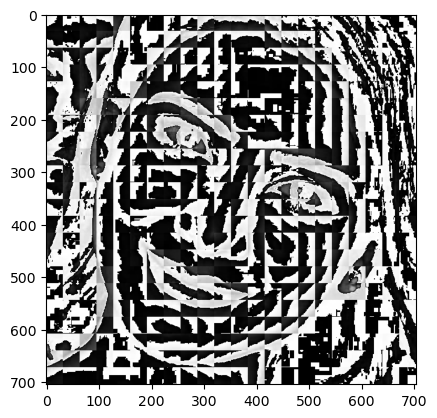

In [21]:
im_har = w2d(crop,'db1',5)
plt.imshow(im_har,cmap = 'gray')

In [22]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count +=1
class_dict

{'cropped': 0, 'ntr': 1, 'pawan kalyan': 2, 'prabhas': 3, 'samantha': 4}

In [23]:
x = []
y = []

for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None :
            continue
        scalled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(im_har,(32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])

In [24]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

(262, 4096)

In [25]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
pipe = Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel = 'rbf',C = 10))])
pipe.fit(x_train,y_train)
pipe.score(x_test,y_test)

0.6666666666666666

In [27]:
len(x_test)

66

In [28]:
print(classification_report(y_test,pipe.predict(x_test)))

              precision    recall  f1-score   support

           1       0.42      0.62      0.50        13
           2       0.79      0.88      0.83        17
           3       0.77      0.48      0.59        21
           4       0.73      0.73      0.73        15

    accuracy                           0.67        66
   macro avg       0.68      0.68      0.66        66
weighted avg       0.70      0.67      0.67        66



In [29]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [30]:
model_params = {
    'svm':{
        'model':svm.SVC(gamma='auto',probability = True),
        'params': {
            'svc__C':[1,10,100,1000],
            'svc__kernel':['rbf','linear']
        }
    },
    'randam_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [31]:
scores = []
best_estimators = {}
import pandas as pd 
for algo,mp in model_params.items():
    pipe = make_pipeline(StandardScaler(),mp['model'])
    clf = GridSearchCV(pipe,mp['params'],cv =5,return_train_score = False)
    clf.fit(x_train,y_train)
    scores.append({
        'model':algo,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.719615,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,randam_forest,0.684615,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.724744,{'logisticregression__C': 1}


In [32]:
scores

[{'model': 'svm',
  'best_score': 0.7196153846153847,
  'best_params': {'svc__C': 1, 'svc__kernel': 'linear'}},
 {'model': 'randam_forest',
  'best_score': 0.6846153846153846,
  'best_params': {'randomforestclassifier__n_estimators': 10}},
 {'model': 'logistic_regression',
  'best_score': 0.7247435897435898,
  'best_params': {'logisticregression__C': 1}}]

In [33]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'randam_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [34]:
best_estimators['svm'].score(x_test,y_test)

0.7121212121212122

In [35]:
best_estimators['randam_forest'].score(x_test,y_test)

0.6666666666666666

In [36]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.7272727272727273

In [37]:
best_clf = best_estimators['svm']

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,best_clf.predict(x_test))
cm

array([[ 8,  2,  1,  2],
       [ 1, 14,  0,  2],
       [ 7,  1, 12,  1],
       [ 1,  1,  0, 13]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

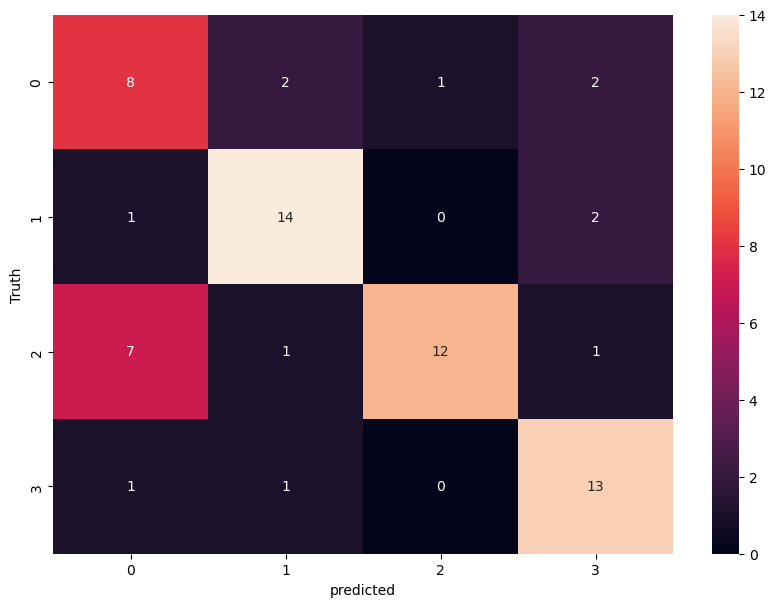

In [39]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [40]:
!pip install joblib
import joblib
joblib.dump(best_clf,'saved_model.pkl')

Defaulting to user installation because normal site-packages is not writeable


['saved_model.pkl']

In [41]:
import json
with open("class_dictonary.josn","w")as f:
    f.write(json.dumps(class_dict))